<a href="https://colab.research.google.com/github/abcdofbigdata/agents/blob/main/langchain_aws.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install langchain langchain-aws langchain-community -q

In [3]:
import os
from google.colab import userdata

os.environ["AWS_ACCESS_KEY_ID"] = userdata.get('aws_access_key')
os.environ["AWS_SECRET_ACCESS_KEY"] = userdata.get('aws_secret_access_key')

In [51]:
from langchain_aws import ChatBedrockConverse

llm = ChatBedrockConverse(
    #model_id="us.anthropic.claude-3-5-sonnet-20241022-v2:0",
    model_id="us.meta.llama4-maverick-17b-instruct-v1:0",
     region_name="us-east-1",

)

In [52]:
messages = [
    (
        "system",
        "You are a helpful assistant that translates English to French. Translate the user sentence.",
    ),
    ("human", "I love programming."),
]
ai_msg = llm.invoke(messages)
ai_msg

AIMessage(content="J'adore la programmation.", additional_kwargs={}, response_metadata={'ResponseMetadata': {'RequestId': '8b31df4a-8e9d-4620-9a77-c7e55df26356', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Tue, 19 Aug 2025 12:40:45 GMT', 'content-type': 'application/json', 'content-length': '205', 'connection': 'keep-alive', 'x-amzn-requestid': '8b31df4a-8e9d-4620-9a77-c7e55df26356'}, 'RetryAttempts': 0}, 'stopReason': 'end_turn', 'metrics': {'latencyMs': [162]}, 'model_name': 'us.meta.llama4-maverick-17b-instruct-v1:0'}, id='run--2f7480b6-771c-4d39-bbd6-dc4a5a2a8e68-0', usage_metadata={'input_tokens': 55, 'output_tokens': 7, 'total_tokens': 62, 'input_token_details': {'cache_creation': 0, 'cache_read': 0}})

In [8]:
ai_msg.content

"J'aime la programmation."

In [10]:
!pip install langgraph -q

In [40]:

from langchain_community.tools import TavilySearchResults
from langgraph.prebuilt import create_react_agent

In [41]:
os.environ["TAVILY_API_KEY"] = userdata.get('taviliy_key')
tavily_search = TavilySearchResults(max_results=5)

In [42]:
from langchain_core.tools import tool
from datetime import datetime

@tool
def get_current_date():
    """Returns the current date and time. Use this tool first for any time-based queries."""
    return f"The current date is: {datetime.now().strftime('%d %B %Y')}"

In [43]:
tools=[tavily_search,get_current_date]

In [53]:
graph = create_react_agent(llm, tools)

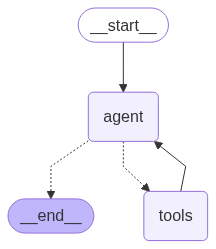

In [45]:
from IPython.display import display, Image

# Visualize the agent's decision-making flow
display(Image(graph.get_graph().draw_mermaid_png()))

In [46]:
# helper function to render markdown
from IPython.display import Markdown, display

def render_markdown(md_string):
    display(Markdown(md_string))

In [47]:
def process_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()
    # return the last message
    return message

In [48]:
# helper function to process query
def process_query(query):
    inputs = {"messages": [("user", query)]}
    message = process_stream(graph.stream(inputs, stream_mode="values"))
    render_markdown(f"## Answer:\n{message.content}")

In [54]:
# Query that will trigger the Tavily search tool
process_query("What is the time now in Mumbai")

================================ Human Message =================================

What is the time now in Mumbai
================================== Ai Message ==================================

[{'type': 'tool_use', 'name': 'get_current_date', 'input': {}, 'id': 'tooluse_VaIlljxKSG-AFKs1wCwNBA'}]
Tool Calls:
  get_current_date (tooluse_VaIlljxKSG-AFKs1wCwNBA)
 Call ID: tooluse_VaIlljxKSG-AFKs1wCwNBA
  Args:
================================= Tool Message =================================
Name: get_current_date

The current date is: 19 August 2025
================================== Ai Message ==================================

[{'type': 'tool_use', 'name': 'tavily_search_results_json', 'input': {'query': 'Mumbai current time'}, 'id': 'tooluse_wR8EJDdcQ7qpWMPk0R0Ffg'}]
Tool Calls:
  tavily_search_results_json (tooluse_wR8EJDdcQ7qpWMPk0R0Ffg)
 Call ID: tooluse_wR8EJDdcQ7qpWMPk0R0Ffg
  Args:
    query: Mumbai current time
================================= Tool Message ====================

## Answer:
The current time in Mumbai is 18:11 IST (India Standard Time) on Tuesday, August 19, 2025.

In [55]:
process_query("What is the temperature in bangalore now?")

================================ Human Message =================================

What is the temperature in bangalore now?
================================== Ai Message ==================================

[{'type': 'tool_use', 'name': 'tavily_search_results_json', 'input': {'query': 'Bangalore current temperature'}, 'id': 'tooluse_CquSvSf1RsyX5oPGrOb_tQ'}]
Tool Calls:
  tavily_search_results_json (tooluse_CquSvSf1RsyX5oPGrOb_tQ)
 Call ID: tooluse_CquSvSf1RsyX5oPGrOb_tQ
  Args:
    query: Bangalore current temperature
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Hour-by-Hour Forecast for Bengaluru, Karnataka, India", "url": "https://www.timeanddate.com/weather/india/bengaluru/hourly", "content": "| 9:00 am |  | 72 °F | Passing showers. Overcast. | 72 °F | 15 mph | ↑ | 80% | 28% | 0.00\" (snow) 0.00\" (rain) |\n| 10:00 am |  | 74 °F | Passing showers. Overcast. | 75 °F | 16 mph | ↑ | 75% | 25% | 0.00\" (sn

## Answer:
The current temperature in Bangalore is 73 °F.